In [1]:
import yfinance as yf
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Задание 1

In [2]:
# Для того, чтобы определить название тикера каждой компании была написана данная функция
from fuzzywuzzy import process
import requests

def getCompany(text):
    r = requests.get('https://api.iextrading.com/1.0/ref-data/symbols')
    stockList = r.json()
    return process.extractOne(text, stockList)[0]


getCompany('Facebook')

C:\Users\USER\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


{'symbol': 'FB',
 'name': 'FACEBOOK INC-CLASS A',
 'date': '2021-06-18',
 'isEnabled': True,
 'type': 'N/A',
 'iexId': '2408'}

In [3]:
getCompany('Google')

{'symbol': 'GOOGL',
 'name': 'ALPHABET INC-CL A',
 'date': '2021-06-18',
 'isEnabled': True,
 'type': 'N/A',
 'iexId': '10657'}

In [4]:
getCompany('Apple')

{'symbol': 'AAPL',
 'name': 'APPLE INC',
 'date': '2021-06-18',
 'isEnabled': True,
 'type': 'N/A',
 'iexId': '11'}

# Задание 2

In [5]:
# Создание dataframe для трех компаний, в котором храняться значения цен акций в момент закрытия
ticker_list = ['AAPL', 'GOOGL', 'FB']
price_close = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
    price_close[ticker] = yf.download(ticker,'2011-06-20','2021-06-20')['Adj Close']
price_close.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,GOOGL,FB
Date,,,
2011-06-20,9.683733,242.532532,NaN
2011-06-21,9.990229,246.746750,NaN
2011-06-22,9.907616,243.748749,NaN
2011-06-23,10.172344,240.350357,NaN
2011-06-24,10.022475,237.677673,NaN


In [6]:
#Расчет daily retern
daily_returns = price_close.pct_change()
print(daily_returns.head())

                AAPL     GOOGL  FB
Date                              
2011-06-20       NaN       NaN NaN
2011-06-21  0.031651  0.017376 NaN
2011-06-22 -0.008269 -0.012150 NaN
2011-06-23  0.026720 -0.013942 NaN
2011-06-24 -0.014733 -0.011120 NaN


<AxesSubplot:>

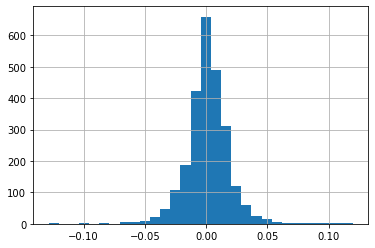

In [7]:
daily_returns.AAPL.hist(bins=30)

In [8]:
print(daily_returns.AAPL.describe())

count    2516.000000
mean        0.001198
std         0.018106
min        -0.128647
25%        -0.007132
50%         0.000892
75%         0.010473
max         0.119808
Name: AAPL, dtype: float64


<AxesSubplot:>

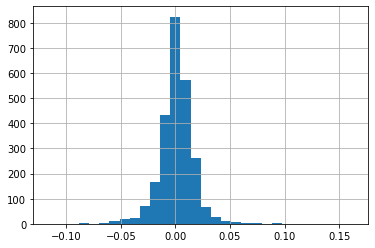

In [9]:
daily_returns.GOOGL.hist(bins=30)

In [10]:
print(daily_returns.GOOGL.describe())

count    2516.000000
mean        0.001045
std         0.016393
min        -0.116342
25%        -0.006396
50%         0.000968
75%         0.009159
max         0.162584
Name: GOOGL, dtype: float64


<AxesSubplot:>

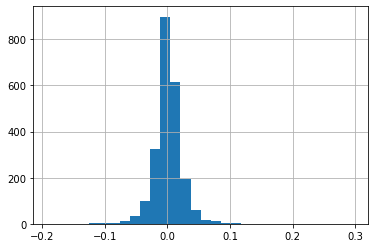

In [11]:
daily_returns.FB.hist(bins=30)

In [12]:
print(daily_returns.FB.describe())

count    2285.000000
mean        0.001214
std         0.023382
min        -0.189609
25%        -0.009449
50%         0.001054
75%         0.012337
max         0.296115
Name: FB, dtype: float64


Визуально все графики похожи на нормальное распределение. Чтобы это сравнить,были построены графики нормального распределения поверх гистограм.

(array([ 0.09598263,  0.        ,  0.        ,  0.09598263,  0.        ,
         0.14397395,  0.        ,  0.33593921,  0.33593921,  0.47991316,
         1.05580895,  2.20760054,  5.23105344,  8.97437609, 20.25233535,
        31.62627724, 23.56373615, 14.87730796,  5.7109666 ,  2.83148764,
         1.1997829 ,  0.71986974,  0.33593921,  0.19196526,  0.14397395,
         0.04799132,  0.14397395,  0.04799132,  0.04799132,  0.04799132]),
 array([-0.12864696, -0.12036512, -0.11208328, -0.10380145, -0.09551961,
        -0.08723777, -0.07895593, -0.0706741 , -0.06239226, -0.05411042,
        -0.04582858, -0.03754675, -0.02926491, -0.02098307, -0.01270124,
        -0.0044194 ,  0.00386244,  0.01214428,  0.02042611,  0.02870795,
         0.03698979,  0.04527163,  0.05355346,  0.0618353 ,  0.07011714,
         0.07839898,  0.08668081,  0.09496265,  0.10324449,  0.11152633,
         0.11980816]),
 <BarContainer object of 30 artists>)

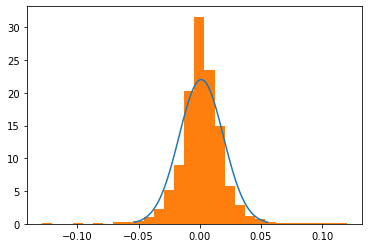

In [13]:
mu = daily_returns.AAPL.mean()
sigma = daily_returns.AAPL.std()

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, sts.norm.pdf(x, mu, sigma))
plt.hist(daily_returns.AAPL, bins=30, density=True)

(array([ 0.04274861,  0.        ,  0.        ,  0.12824582,  0.04274861,
         0.08549721,  0.42748605,  0.76947489,  1.06871513,  3.07789957,
         7.05351985, 18.59564325, 35.26759927, 24.40945355, 11.24288316,
         2.82140794,  1.19696094,  0.55573187,  0.25649163,  0.08549721,
         0.12824582,  0.04274861,  0.12824582,  0.        ,  0.        ,
         0.        ,  0.04274861,  0.04274861,  0.        ,  0.04274861]),
 array([-0.11634152, -0.10704399, -0.09774647, -0.08844894, -0.07915141,
        -0.06985389, -0.06055636, -0.05125884, -0.04196131, -0.03266378,
        -0.02336626, -0.01406873, -0.0047712 ,  0.00452632,  0.01382385,
         0.02312137,  0.0324189 ,  0.04171643,  0.05101395,  0.06031148,
         0.06960901,  0.07890653,  0.08820406,  0.09750158,  0.10679911,
         0.11609664,  0.12539416,  0.13469169,  0.14398922,  0.15328674,
         0.16258427]),
 <BarContainer object of 30 artists>)

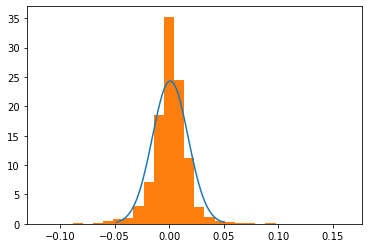

In [14]:
mu = daily_returns.GOOGL.mean()
sigma = daily_returns.GOOGL.std()

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, sts.norm.pdf(x, mu, sigma))
plt.hist(daily_returns.GOOGL, bins=30, density=True)

(array([ 0.02702997,  0.        ,  0.02702997,  0.        ,  0.05405994,
         0.05405994,  0.13514985,  0.37841959,  0.919019  ,  2.67596708,
         8.73068046, 24.27291349, 16.65046181,  5.24381427,  1.67585817,
         0.40544956,  0.2702997 ,  0.05405994,  0.05405994,  0.02702997,
         0.02702997,  0.02702997,  0.        ,  0.02702997,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02702997]),
 array([-0.18960922, -0.17341842, -0.15722763, -0.14103683, -0.12484603,
        -0.10865524, -0.09246444, -0.07627364, -0.06008285, -0.04389205,
        -0.02770125, -0.01151046,  0.00468034,  0.02087114,  0.03706194,
         0.05325273,  0.06944353,  0.08563433,  0.10182512,  0.11801592,
         0.13420672,  0.15039751,  0.16658831,  0.18277911,  0.1989699 ,
         0.2151607 ,  0.2313515 ,  0.24754229,  0.26373309,  0.27992389,
         0.29611469]),
 <BarContainer object of 30 artists>)

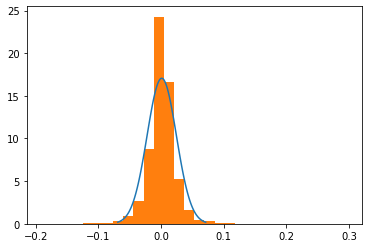

In [15]:
mu = daily_returns.FB.mean()
sigma = daily_returns.FB.std()

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, sts.norm.pdf(x, mu, sigma))
plt.hist(daily_returns.FB, bins=30, density=True)

На мой взгляд распределение доходностей стационарно по времени, так как мы их можем аппроксимировать нормальной функцией распределения и  ее свойства не будут меняться во времени.

In [16]:
daily_returns.fillna(0, inplace=True)

In [17]:
gc_res = grangercausalitytests(daily_returns[['AAPL','GOOGL']], 6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4175  , p=0.0357  , df_denom=2513, df_num=1
ssr based chi2 test:   chi2=4.4227  , p=0.0355  , df=1
likelihood ratio test: chi2=4.4189  , p=0.0355  , df=1
parameter F test:         F=4.4175  , p=0.0357  , df_denom=2513, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2351  , p=0.1072  , df_denom=2510, df_num=2
ssr based chi2 test:   chi2=4.4792  , p=0.1065  , df=2
likelihood ratio test: chi2=4.4752  , p=0.1067  , df=2
parameter F test:         F=2.2351  , p=0.1072  , df_denom=2510, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6150  , p=0.1838  , df_denom=2507, df_num=3
ssr based chi2 test:   chi2=4.8585  , p=0.1825  , df=3
likelihood ratio test: chi2=4.8538  , p=0.1828  , df=3
parameter F test:         F=1.6150  , p=0.1838  , df_denom=2507, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1964  , p=0.

В коде выше рассмотрена причинность по Грэнджеру. Как видно при lags = 6 все значения p = 0, значит есть взаимосвязь между акциями Apple и Google.

In [18]:
gc_res = grangercausalitytests(daily_returns[['FB','GOOGL']], [837])


Granger Causality
number of lags (no zero) 837
ssr based F test:         F=2.3009  , p=0.1754  , df_denom=5, df_num=837
ssr based chi2 test:   chi2=647075.9242, p=0.0000  , df=837
likelihood ratio test: chi2=10006.5215, p=0.0000  , df=837
parameter F test:         F=2.3009  , p=0.1754  , df_denom=5, df_num=837


Честно говоря, я прочитал несолько статей на эту тему (анализ причинности по Грэнджеру), но мне  так и не удалось понять, что говорит данная комбинация параметров.

# Задание 3

In [54]:
#узнаем количесвто строк
k = daily_returns.shape[0]
print(k)

2517


In [55]:
pnl_a_i = np.zeros(shape=(3,k))

In [56]:
def get_rand(ticker):
    f = np.random.randn(1, k)
    return (f.T)*daily_returns[[ticker]],f

In [57]:
#Попытка засунуть все в цикл провалилась :(
ticker = 'AAPL'
for i in range(3):
    pnl_a_i[[i]] = get_rand(ticker)

ValueError: setting an array element with a sequence.

In [58]:
pnl_a_1 = np.zeros(shape=(3,k))
pnl_a_2 = np.zeros(shape=(3,k))
pnl_f_1 = np.zeros(shape=(3,k))
pnl_f_2 = np.zeros(shape=(3,k))
pnl_g_1 = np.zeros(shape=(3,k))
pnl_g_2 = np.zeros(shape=(3,k))


In [59]:
ticker = 'AAPL'
pnl_a_1, f_a_1 = get_rand(ticker)
pnl_a_2, f_a_2 = get_rand(ticker)

In [60]:
pnl_a_for_1 = np.cumsum(pnl_a_1)
pnl_a_for_2 = np.cumsum(pnl_a_2)

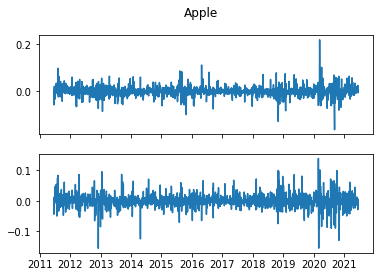

In [61]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Apple')
ax1.plot(pnl_a_1)
ax2.plot(pnl_a_2)

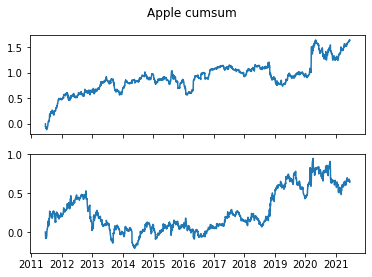

In [62]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Apple cumsum')
ax1.plot(pnl_a_for_1)
ax2.plot(pnl_a_for_2)

In [63]:
ticker = 'FB'
pnl_f_1, f_f_1 = get_rand(ticker)
pnl_f_2, f_f_2 = get_rand(ticker)

In [64]:
pnl_f_for_1 = np.cumsum(pnl_f_1)
pnl_f_for_2 = np.cumsum(pnl_f_2)

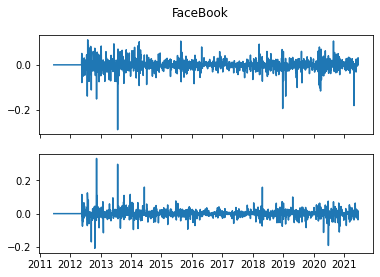

In [65]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('FaceBook')
ax1.plot(pnl_f_1)
ax2.plot(pnl_f_2)

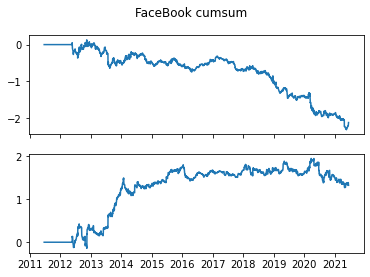

In [66]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('FaceBook cumsum')
ax1.plot(pnl_f_for_1)
ax2.plot(pnl_f_for_2)

In [67]:
ticker = 'GOOGL'
pnl_g_1, f_g_1 = get_rand(ticker)
pnl_g_2, f_g_2 = get_rand(ticker)

In [68]:
pnl_g_for_1 = np.cumsum(pnl_g_1)
pnl_g_for_2 = np.cumsum(pnl_g_2)

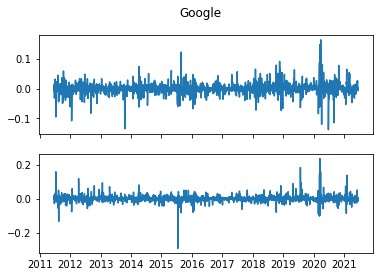

In [69]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Google')
ax1.plot(pnl_g_1)
ax2.plot(pnl_g_2)

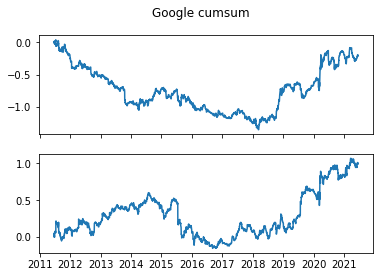

In [70]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Google cumsum')
ax1.plot(pnl_g_for_1)
ax2.plot(pnl_g_for_2)

# Задание 4

## Я не понял, с чем связано то, что цикл не работает, поэтому тут мало точек.

In [100]:
sr_a_1 = pnl_a_1.mean()/pnl_a_1.std()
sr_a_2 = pnl_a_2.mean()/pnl_a_1.std()
sr_a = [sr_a_1, sr_a_2]
sr_f_1 = pnl_f_1.mean()/pnl_f_1.std()
sr_f_2 = pnl_f_2.mean()/pnl_f_2.std()
sr_f = [sr_f_1, sr_f_2]
sr_g_1 = pnl_g_1.mean()/pnl_g_1.std()
sr_g_2 = pnl_g_2.mean()/pnl_g_2.std()
sr_g = [sr_g_1, sr_g_2]

In [81]:
daily_returns['AAPL']

Date
2011-06-20    0.000000
2011-06-21    0.031651
2011-06-22   -0.008269
2011-06-23    0.026720
2011-06-24   -0.014733
                ...   
2021-06-14    0.024578
2021-06-15   -0.006438
2021-06-16    0.003934
2021-06-17    0.012601
2021-06-18   -0.010092
Name: AAPL, Length: 2517, dtype: float64

In [90]:
k_a_1 = 0
for j in range(k):
    if np.sign(daily_returns['AAPL'][j]) == np.sign(f_a_1[0][j]):
        k_a_1 = k_a_1+1

In [91]:
k_a_2 = 0
for j in range(k):
    if np.sign(daily_returns['AAPL'][j]) == np.sign(f_a_2[0][j]):
        k_a_2 = k_a_2+1

In [92]:
k_g_1 = 0
for j in range(k):
    if np.sign(daily_returns['AAPL'][j]) == np.sign(f_g_1[0][j]):
        k_g_1 = k_g_1+1

In [93]:
k_g_2 = 0
for j in range(k):
    if np.sign(daily_returns['AAPL'][j]) == np.sign(f_g_2[0][j]):
        k_g_2 = k_g_2+1

In [94]:
k_f_1 = 0
for j in range(k):
    if np.sign(daily_returns['AAPL'][j]) == np.sign(f_f_1[0][j]):
        k_f_1 = k_f_1+1

In [95]:
k_f_2 = 0
for j in range(k):
    if np.sign(daily_returns['AAPL'][j]) == np.sign(f_f_2[0][j]):
        k_f_2 = k_f_2+1

In [102]:
h_r_a = [k_a_1/k, k_a_2/k]

h_r_f = [k_f_1/k, k_f_2/k]

h_r_g = [k_g_1/k, k_g_2/k]

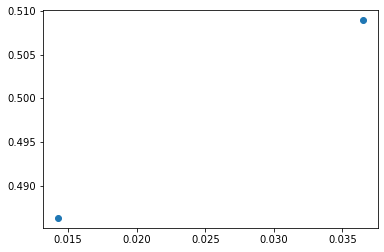

In [103]:
plt.scatter(sr_a, h_r_a)
plt.show()


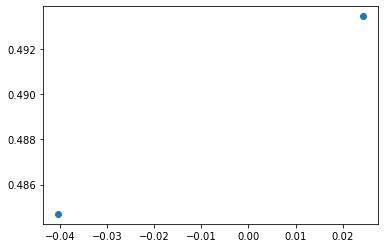

In [104]:
plt.scatter(sr_f, h_r_f)
plt.show()


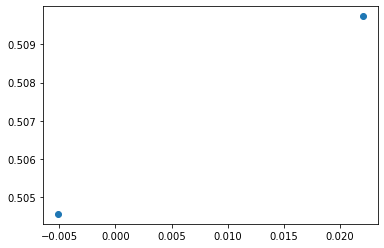

In [105]:
plt.scatter(sr_g, h_r_g)
plt.show()